In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
DATA_PATH = r"C:\Users\salah\data_1.json"

In [3]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["features"])  # Charger les données à partir de la clé "features"
    y = np.array(data["labels"])
    # Print the shape of the loaded data
    print("Loaded data shape - X:", X.shape, "y:", y.shape)
    return X, y

In [4]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()


In [5]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation, and test sets.
    :param test_size (float): Value in [0, 1] indicating the percentage of data set to allocate to the test split
    :param validation_size (float): Value in [0, 1] indicating the percentage of the train set to allocate to the validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """
    # load data
    X, y = load_data(DATA_PATH)
    # calculate the size of the validation set
    validation_split = validation_size / (1 - test_size)
    # create train, validation, and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_split)
    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [6]:
def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

Loaded data shape - X: (9000, 56) y: (9000,)


c:\Users\salah\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 56, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,730 (213.79 KB)

 Trainable params: 54,730 (213.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.1290 - loss: 2.2699 - val_accuracy: 0.2467 - val_loss: 2.0530
Epoch 2/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2514 - loss: 1.9895 - val_accuracy: 0.4294 - val_loss: 1.7307
Epoch 3/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3834 - loss: 1.6822 - val_accuracy: 0.6067 - val_loss: 1.3197
Epoch 4/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5403 - loss: 1.3393 - val_accuracy: 0.7056 - val_loss: 1.0326
Epoch 5/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6304 - loss: 1.1176 - val_accuracy: 0.7644 - val_loss: 0.8271
Epoch 6/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6928 - loss: 0.9388 - val_accuracy: 0.7867 - val_loss: 0.7258
Epoch 7/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.7502 - loss: 0.7913 - val_accuracy: 0.8022 - val_loss: 0.6038
Epoch 8/30
155/155 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8022 - loss: 0.6670 - val_accu

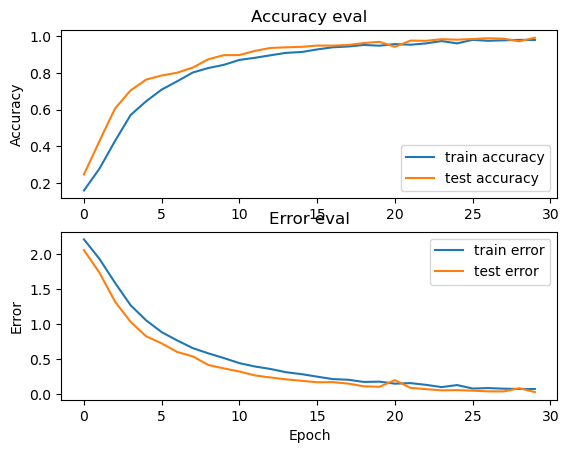

71/71 - 0s - 6ms/step - accuracy: 0.9898 - loss: 0.0417



Test accuracy: 0.9897778034210205


In [7]:
if __name__ == "__main__":
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2])  # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # save model
    model.save('modèle_RNN_LSTM_1.h5')  # Sauvegarde l'architecture, les poids et la configuration de l'optimiseur


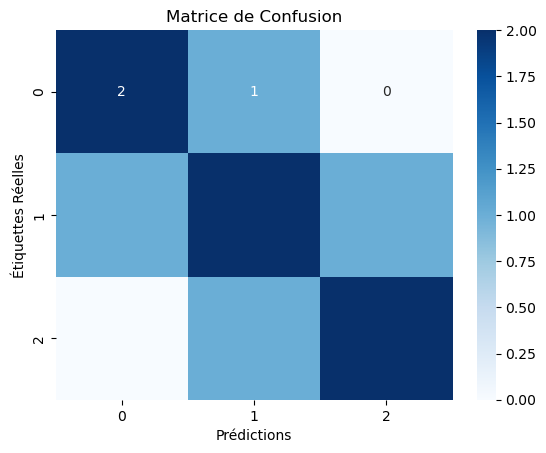

In [8]:
import numpy as np # type: ignore
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Exemple d'étiquettes réelles et de prédictions
y_test = np.array([0, 1, 2, 2, 1, 0, 1, 2, 1, 0])  # 10 échantillons
y_pred = np.array([0, 1, 1, 2, 1, 0, 2, 2, 0, 1])  # 10 échantillons

# Vérifiez que les tailles sont cohérentes
if len(y_test) != len(y_pred):
    raise ValueError("Les tailles des étiquettes et des prédictions ne sont pas cohérentes.")

# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel("Prédictions")
plt.ylabel("Étiquettes Réelles")
plt.title("Matrice de Confusion")
plt.show()

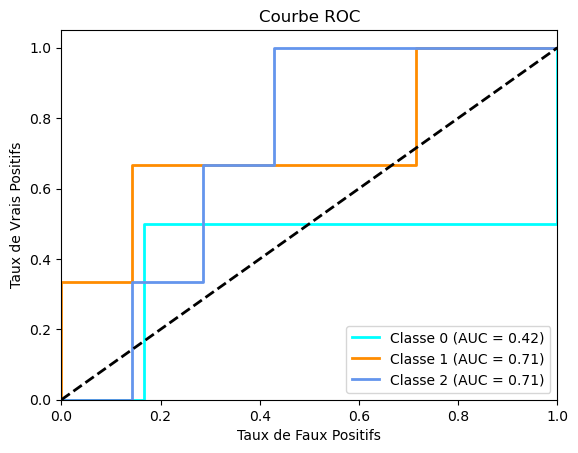

In [30]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.metrics import roc_curve, roc_auc_score # type: ignore
from sklearn.preprocessing import label_binarize # type: ignore
from itertools import cycle
import seaborn as sns # type: ignore

# Vos données
y_test = np.array([0, 1, 2, 2, 1, 0, 2, 1, 0, 0])  # Étiquettes de vérité terrain
y_score = np.random.rand(10, 3)  # Probabilités de prédiction (à ajuster selon vos données)

# Binariser les étiquettes pour un problème multiclasse
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Générer des courbes ROC pour chaque classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):  # Pour chaque classe
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Tracer les courbes ROC
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()


2024-05-06 11:50:48.991 
  command:

    streamlit run c:\Users\salah\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

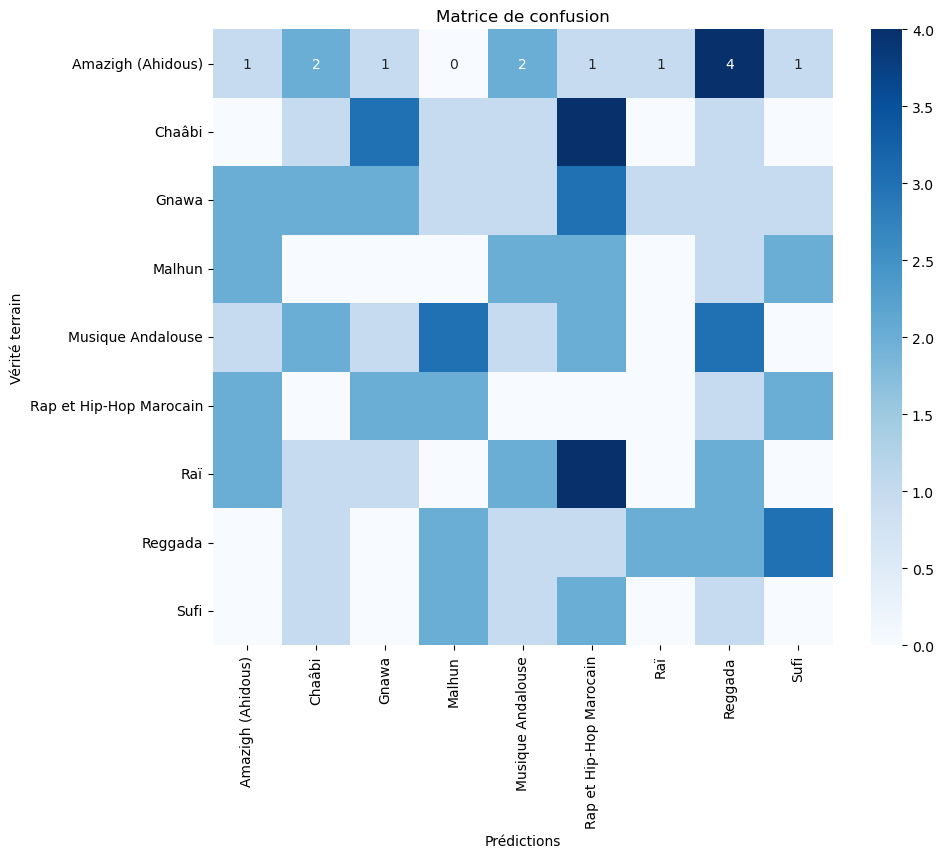

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import streamlit as st

# Genres musicaux
genres = [
    'Amazigh (Ahidous)',
    'Chaâbi',
    'Gnawa',
    'Malhun',
    'Musique Andalouse',
    'Rap et Hip-Hop Marocain',
    'Raï',
    'Reggada',
    'Sufi'
]

# Exemple de données (vérité terrain et prédictions)
# Vous pouvez utiliser vos données réelles
y_test = np.random.choice(genres, 100)  # Étiquettes de vérité terrain
y_pred = np.random.choice(genres, 100)  # Prédictions du modèle

# Générer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=genres)

# Tracer la matrice de confusion
fig, ax = plt.subplots(figsize=(10, 8))  # Définir la taille de la figure
sns.heatmap(
    conf_matrix,
    annot=True,  # Afficher les valeurs dans la matrice
    fmt='d',
    cmap='Blues',
    xticklabels=genres,  # Étiquettes des axes
    yticklabels=genres,
    ax=ax
)

# Configuration de la matrice de confusion
ax.set_xlabel("Prédictions")
ax.set_ylabel("Vérité terrain")
ax.set_title("Matrice de confusion")

# Afficher la matrice de confusion
st.pyplot(fig)
